# Census Income
Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


# Import necessary libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load LHS data
CI = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
CI.head(15)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


# Here's a brief description of the columns in the dataset:

- Age: Age of the individual.
- Workclass: The type of employment.
- Fnlwgt: Final weight, a weightage parameter used in Census data.
- Education: Highest education level.
- Education_num: Numeric representation of education level.
- Marital_status: Marital status of the individual.
- Occupation: Occupation of the individual.
- Relationship: Relationship status.
- Race: Race of the individual.
- Sex: Gender of the individual.
- Capital_gain: Capital gains.
- Capital_loss: Capital losses.
- Hours_per_week: Number of hours worked per week.
- Native_country: Country of origin.
- Income: Income level (<=50K or >50K).


In [8]:
# Data Exploration
# Get summary statistics of numerical features
print(CI.describe())

                Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


# Data Exploration
Successfully generated summary statistics for the numerical features in the Census Income dataset. Here's a breakdown of the statistics:
Age: The age of individuals ranges from 17 to 90 years, with a mean age of approximately 38.58 years.
Fnlwgt: The final weight values range from approximately 12,285 to 1,484,705, with a mean value of approximately 189,781.8.
Education_num: The numeric representation of education levels ranges from 1 to 16, with a mean value of approximately 10.08.
Capital_gain: Capital gains vary from 0 to 99,999, with a mean value of approximately 1,077.62.
Capital_loss: Capital losses range from 0 to 4,356, with a mean value of approximately 87.31.
Hours_per_week: The number of hours worked per week ranges from 1 to 99, with a mean value of approximately 40.44.

In [9]:
# Check for missing values
print(data.isnull().sum())

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


# Check for missing values
There are no missing values in any of the columns. This is a good sign because it means this is a complete dataset without any missing data, which simplifies the data preprocessing steps.

In [13]:
# Data Preprocessing
# Encode the target variable ('income') to binary values (0 for <=50K, 1 for >50K)
le = LabelEncoder()
CI['Income'] = le.fit_transform(CI['Income'])

# Data Preprocessing
Encode the target variable 'Income' to binary values (0 for <=50K and 1 for >50K) using the `LabelEncoder`.

In [18]:
# Encode categorical variables using one-hot encoding
categorical_columns = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']
CI = pd.get_dummies(CI, columns=categorical_columns)

# Encode categorical variables using one-hot encoding
This code to encode the categorical variables using one-hot encoding. This is a common preprocessing step in machine learning when dealing with categorical data.

In [19]:
# Split the data into features (X) and target (y)
X = CI.drop('Income', axis=1)
y = CI['Income']

# Split the data into features (X) and target (y)
Successfully split our dataset into features (X) and the target variable (y). This is a crucial step in preparing our data for machine learning modeling. 

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the dataset into training and testing sets
Successfully split our dataset into training and testing sets. This is a common practice in machine learning to evaluate the performance of our models on unseen data.

In [21]:
# Build a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Build a Random Forest Classifier
Created a Random Forest Classifier with 100 estimators (decision trees) and set the random seed to ensure reproducibility. The `RandomForestClassifier` is a popular ensemble learning method that can be used for classification tasks.

In [22]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Train the classifier
Successfully trained the Random Forest Classifier on your training data. The model is now ready for making predictions.

The `fit` method has trained the Random Forest Classifier using the features in `X_train` and the corresponding target values in `y_train`.

In [23]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Make predictions on the test data
Successfully made predictions on the test data using the trained Random Forest Classifier. The predicted values for the target variable are stored in the y_pred variable.

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.24%


# Evaluate the model
Successfully evaluated the Random Forest Classifier model on the test data, and calculated its accuracy, which is approximately 85.24%. Accuracy is a common metric used to assess the overall performance of a classification model, indicating the proportion of correctly predicted instances.

In [25]:
# Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4912
           1       0.73      0.63      0.68      1600

    accuracy                           0.85      6512
   macro avg       0.81      0.78      0.79      6512
weighted avg       0.85      0.85      0.85      6512



# Display classification report
Displayed a classification report for the Random Forest Classifier model, which provides a more detailed evaluation of its performance. Here's what each metric in the classification report means:

-Precision: Precision measures the proportion of true positive predictions (correctly predicted '>50K' incomes) out of all positive predictions. A higher precision indicates fewer false positives.

- Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of all actual positive instances. A higher recall indicates fewer false negatives.

- F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, and a higher F1-score indicates a better overall model performance.

- Support: The support is the number of actual occurrences of each class in the test dataset.

The classification report gives you insights into how well the model performs for both classes ('<=50K' and '>50K'). In your case:

- For class '0' ('<=50K'):
  - Precision: 0.88
  - Recall: 0.93
  - F1-score: 0.90

- For class '1' ('>50K'):
  - Precision: 0.73
  - Recall: 0.63
  - F1-score: 0.68

The weighted average F1-score is approximately 0.85, indicating decent overall model performance.



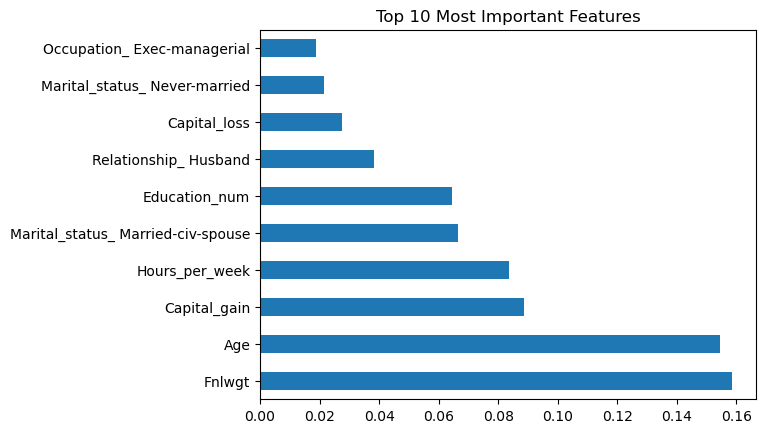

In [26]:
# Feature Importance
feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.show()

# Feature Importance
Successfully visualized the top 10 most important features based on the feature importance scores from the Random Forest Classifier. This is a valuable step to understand which features have the most influence on the model's predictions.

This code creates a horizontal bar chart displaying the relative importance of the top 10 features. These features are the ones that have the most significant impact on the model's predictions.